SVMs try to find decision boundaries that maximise margin separation around the boundary. Achieved by minimizing the *hinge* loss.

hinge(s) = max(0, 1-ys)

s is the output for the SVM classifer and y the class label. Output s determines which side of a decision boundary a data point is.

To summarize, support vector machines try to find a decision boundary with the largest margin while minimizing the number of data points inside its margin or on the wrong side of the decision boundary.

In practice, we can control this trade-off with a 
C
 parameter. Small values produce classifiers that try to maximize the margin (can lead to underfitting) whereas larger values produce classifiers that try to avoid misclassifying data points (can lead to overfitting). In that sense, this 
C
 parameter controls the complexity of the model and is similar to the 
C
 parameter in logistic regressions.

**Dual problem and kernel trick**

Value of the kernel is a function of the Euclidean distance between to the two points ie a "similarity measure". POints close to each other have a kernel value of 1. The gamma parameter controls hwo much points can affect each other. Large gamma values produce small kernel values, except if the two points are close to each other, and we can increase the effect of points further away by decreasing gamma.

support vector machines work well with kernels because the decision boundary only depends on a subset of the data points with a nonzero entry in the α parameter (the support vectors)

**Scikit-learn implementation**

In [1]:
from sklearn.datasets import make_circles

# Generate circle dataset
X, y = make_circles(n_samples=200, shuffle=True, noise=0.3, random_state=0, factor=0.3)

Start with linear SVM

In [2]:
from sklearn.svm import LinearSVC

# Create SVM with linear kernel
linear_svc = LinearSVC()

# Fit estimator
linear_svc.fit(X, y)

LinearSVC()

In [3]:
import numpy as np

# Helper function
def decision_surface(ax, x1, x2, y, estimator):
    # Same scale for x- and y-axis
    ax.set_aspect("equal", adjustable="box")

    # Plot data points
    class1_idx = y == 1
    plt.scatter(x1[class1_idx], x2[class1_idx], color="C3", label="class 1")
    plt.scatter(x1[~class1_idx], x2[~class1_idx], color="C0", label="class 0")

    # Create a grid of values
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    x_values = np.linspace(*xlim, num=500)
    y_values = np.linspace(*ylim, num=500)
    xx, yy = np.meshgrid(x_values, y_values)
    grid_points = np.c_[xx.flatten(), yy.flatten()]

    # Compute predictions
    preds = estimator.predict(grid_points)
    zz = preds.reshape(xx.shape)

    # Draw decision boundary
    plt.contour(xx, yy, zz, levels=[0.5], colors="gray")

    # Plot decision surface with level curves
    plt.contourf(xx, yy, zz, alpha=0.1, cmap=plt.cm.coolwarm)
    plt.legend()
    plt.show()

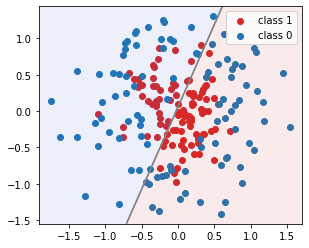

In [4]:
# Plot decision surface
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, linear_svc)

Can see from above need new features (ie x^2 + x^2) to classify data correctly.

For nonlinear classification can use other kernels with svc estimator

In [5]:
from sklearn.svm import SVC

# Create SVM with RBF kernel
rbf_svc_c1 = SVC(kernel="rbf", C=1)

# Fit estimator
rbf_svc_c1.fit(X, y)

SVC(C=1)

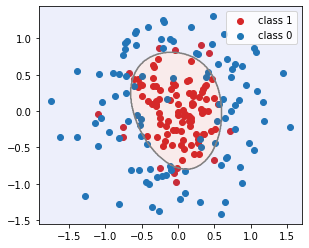

In [6]:
# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rbf_svc_c1)

Boundary formed is an elipsis which suggests overfitting (circle database). Reduce C value to reduce overfit.

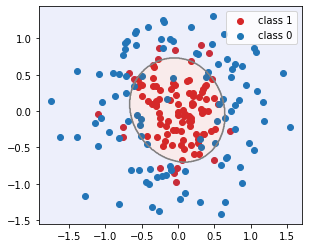

In [7]:
# Create SVM estimator with RBF kernel and C=0.1
rbf_svc_c01 = SVC(kernel="rbf", C=0.1)

# Fit estimator
rbf_svc_c01.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rbf_svc_c01)

Gamma γ is another important parameter of the RBF kernel which controls how much influence each data point has. You can think of this gamma parameter as a way to control how smooth the decision boundary is.

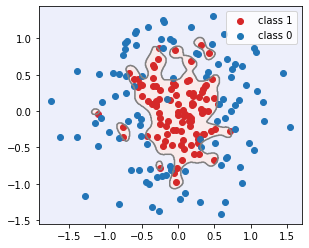

In [8]:
# Create RBF SVM with C=1 and gamma=100
rbf_svc_g100 = SVC(kernel="rbf", C=1, gamma=100)

# Fit estimator
rbf_svc_g100.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rbf_svc_g100)

As we can see, the decision surface becomes very complex and starts overfitting. If we keep increasing gamma, data points need to be really to close to each other to be affected and the classifier cannot generalize anymore.

Can redce complexity of model by reducing gamma

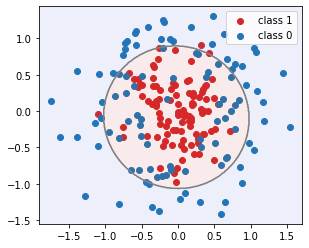

In [9]:
# Create RBF SVM with C=1 and gamma=0.1
rbf_svc_g01 = SVC(kernel="rbf", C=1, gamma=0.1)

# Fit estimator
rbf_svc_g01.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rbf_svc_g01)

Important to get right C and gamma values. Need to tune with grid search.

Note: linear SVC doesnt scale well to a large number of data points.